![Ubco Logo](UBCOLOGO.png)
# ENGR 491 : Theory Exercise 2
## Nicholas Sewell - 89173397
### Oct 7th 2021
---

By translating my student number to be the boundary conditions around the 2d plate, I have the following:

89 deg along left side

17 deg along top side

33 deg along the right side

97 deg along the bottom side

This temperature distribution will be done across a plate, governed by the elliptic equation

$$ \dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2} = 0 $$

The following is Python 3 code, written within this Jupyter Notebook. <br>
Code explanations will be within each block as code comments

---

### Initiate Variables and Initial Conditions

In [1]:
#Importing working libraries

import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

Define grid & iterations:

In [2]:
#Boundary Conditions
AB = 89
CD = 17
EF = 33
GH = 97

#Grid properties and Variables
xlen = 5
ylen = 4
dx = 0.05
dy = 0.05
nx = int(xlen/dx +1)
ny = int(ylen/dy +1)
beta = dx/dy

#This variable is for PSOR, and will be changed 
omega = 1.5

#Max number of interations
max_i = 5000

#Residual Endpoint
e_max = 0.01

In [3]:
#Mesh Array

x = np.linspace(0,xlen,nx)
y = np.linspace(0,ylen,ny)

#Initiate IC's
T1 = np.zeros((nx,ny))
T2 = np.zeros((nx,ny))
T3 = np.zeros((nx,ny))

In [4]:
#Assign Boundary Conditions
for i in range(1,nx-1):
    T1[i,0] = GH      # lower wall = 97C
    T1[i,ny-1] = CD    # upper wall = 17C
    T2[i,0] = GH      # lower wall = 97C
    T2[i,ny-1] = CD    # upper wall = 17C
    T3[i,0] = GH      # lower wall = 97C
    T3[i,ny-1] = CD    # upper wall = 17C
for i in range(ny-1):
    T1[0,i] = AB      # left wall = 89C
    T1[nx-1,i] = EF   # right wall = 33C
    T2[0,i] = AB      # left wall = 89C
    T2[nx-1,i] = EF   # right wall = 33C
    T3[0,i] = AB      # left wall = 89C
    T3[nx-1,i] = EF   # right wall = 33C

In [5]:
# This were done multiple times to allow storage of each method to be saved independently
# 1 = Point Jacobi Method (PJM)
# 2 = Point Gauss Seidel (PGS)
# 3 = Point Successive Over-Relaxation (PSOR)

Tkp1 = np.copy(T1)
Tkp2 = np.copy(T2)
Tkp3 = np.copy(T3)
eps1 = []
eps2 = []
eps3 = []


---

### Start of Numerical Method Simulations
Each of the methods will be ran here
#### Point Jacobi Method

In [6]:
for k1 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Jacobi method
            Tkp1[i,j] = 0.5/(1.0+beta**2) * (T1[i+1,j] + T1[i-1,j]) + 
                        (0.5*beta**2)/(1.0+beta**2) * (T1[i,j+1]+T1[i,j-1])

    # Define residual error as the maximum absolute difference between subsequent iterates            
    eps1 = np.append(eps1,np.amax(np.absolute(np.subtract(Tkp1,T1))))
    
    # Copy new temperature field to old temperature array
    T1 = np.copy(Tkp1)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k1 % 100) == 0:
        print(k1,'|', eps1[k1])
    
    # Test to see if residual error is below threshold; break if yes
    if eps1[k1] < e_max:
        print('Residual threshold reached in', k1, 'iterations')
        break

0 | 46.5
100 | 0.3329309298873824
200 | 0.16665039266396775
300 | 0.11127444830829347
400 | 0.08359102805196983
500 | 0.0669288311305678
600 | 0.055843321551591885
700 | 0.04796869303362428
800 | 0.04214170976622711
900 | 0.03766449256341531
1000 | 0.03409768692858961
1100 | 0.03120429687101023
1200 | 0.028770702085466837
1300 | 0.026711197218411087
1400 | 0.024892922997551636
1500 | 0.02328374799844113
1600 | 0.021815811299219945
1700 | 0.020457698816557013
1800 | 0.01920249392713913
1900 | 0.018031834718044593
2000 | 0.016933585908432747
2100 | 0.015898949615191782
2200 | 0.014930160132770709
2300 | 0.014018641097763407
2400 | 0.013158416244401394
2500 | 0.01235669134662487
2600 | 0.011600600071417944
2700 | 0.010888544992681659
2800 | 0.010220671230172229
Residual threshold reached in 2835 iterations


#### Point Gauss-Seidel Method

In [7]:
for k2 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Gauss-Seidel method
            Tkp2[i,j] = 0.5/(1.0+beta**2) * (T2[i+1,j] + Tkp2[i-1,j]) + 
                        (0.5*beta**2)/(1.0+beta**2)* (T2[i,j+1]+Tkp2[i,j-1])

    # Define residual error as the maximum absolute difference between subsequent iterates            

    eps2 = np.append(eps2,np.amax(np.absolute(np.subtract(Tkp2,T2))))

    # Copy new temperature field to old temperature array

    T2 = np.copy(Tkp2)

    # Print the iteration number and residual to standard output every 25 iterations
    if (k2 % 100) == 0:
        print(k2,'|', eps2[k2])
    
    # Test to see if residual error is below threshold; break if yes
    if eps2[k2] < e_max:
        print('Residual threshold reached in', k2, 'iterations')
        break

0 | 46.5
100 | 0.3131096449611874
200 | 0.15961268095448133
300 | 0.1074481128730227
400 | 0.08145582519166084
500 | 0.06608501840982228
600 | 0.0559458598564575
700 | 0.048592208080876276
800 | 0.0427210435041232
900 | 0.03771033182508887
1000 | 0.03330243243865283
1100 | 0.029389280840980803
1200 | 0.02592407268765129
1300 | 0.02285498811471598
1400 | 0.020146200693275773
1500 | 0.01775116175758029
1600 | 0.015640138562446282
1700 | 0.013782531151527166
1800 | 0.012143757388706433
1900 | 0.010699014590684897
Residual threshold reached in 1954 iterations


#### Point Successive Over-Relaxation

In [8]:
for k3 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Successive Over-relaxation
            Tkp3[i,j] = omega*0.5/(1.0+beta**2) * (T3[i+1,j] + Tkp3[i-1,j]) + (omega*0.5*beta**2)/
                        (1.0+beta**2) * (T3[i,j+1]+Tkp3[i,j-1]) + (1-omega)*T3[i,j]

    # Define residual error as the maximum absolute difference between subsequent iterates            

    eps3 = np.append(eps3,np.amax(np.absolute(np.subtract(Tkp3,T3))))

    # Copy new temperature field to old temperature array

    T3 = np.copy(Tkp3)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k3 % 100) == 0:
        print(k3,'|', eps3[k3])
    
    # Test to see if residual error is below threshold; break if yes
    if eps3[k3] < e_max:
        print('Residual threshold reached in', k3, 'iterations')
        break

0 | 70.575
100 | 0.29980572470717703
200 | 0.15882511820722556
300 | 0.10931730719666177
400 | 0.07561308796244504
500 | 0.051805900473887334
600 | 0.035405589955409766
700 | 0.024187859506909604
800 | 0.016529565070761976
900 | 0.011296679850850921
Residual threshold reached in 933 iterations


Simulations are complete, and data has been stored is k1,k2,k3 and T1,T2,T3.

---

### Data Visualization

Each methods solution is graphed on a contour plot to ensure they all arrived at the same solution.

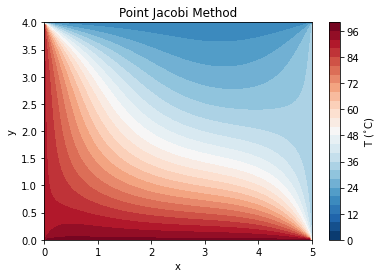

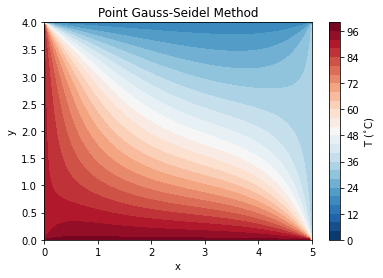

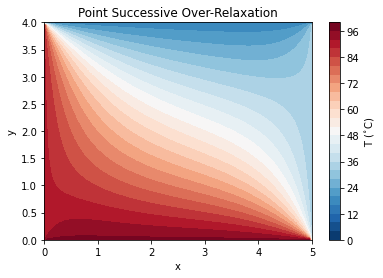

In [9]:
# These are meshgrids with a coloured contour overlap
# This one is for PJM
X, Y = np.meshgrid(x,y,indexing='ij')
plt.contourf(X,Y,T1,25,cmap='RdBu_r')
cbar=plt.colorbar()
cbar.ax.set_ylabel('T ($^{\circ}$C)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Jacobi Method')
plt.show()

# This one is for PGSM
X, Y = np.meshgrid(x,y,indexing='ij')
plt.contourf(X,Y,T2,25,cmap='RdBu_r')
cbar=plt.colorbar()
cbar.ax.set_ylabel('T ($^{\circ}$C)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Gauss-Seidel Method')
plt.show()

# This one is for PSOR
X, Y = np.meshgrid(x,y,indexing='ij')
plt.contourf(X,Y,T3,25,cmap='RdBu_r')
cbar=plt.colorbar()
cbar.ax.set_ylabel('T ($^{\circ}$C)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Successive Over-Relaxation')
plt.show()

It appears all three methods arrived at a nearly identical solution, with only minor visual deviations. 

---

The following graph plots the decline of the solutions residuals against the number of iterations.<br>
It easily illustrates the effectiveness of point succession over-relaxation, as it took less than half the steps.

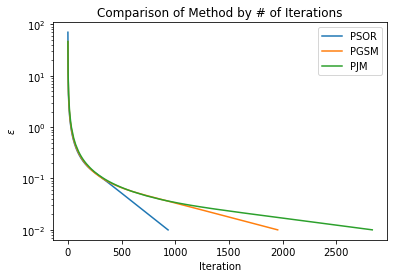

In [10]:
# Plots three seperate lines for each method
plt.plot(np.linspace(0,k3,k3+1),eps3,label='PSOR')
plt.plot(np.linspace(0,k2,k2+1),eps2,label='PGSM')
plt.plot(np.linspace(0,k1,k1+1),eps1,label='PJM')
# Converts error to a log scale
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$\epsilon$')
plt.title('Comparison of Method by # of Iterations')
plt.legend()
plt.show()

In [11]:
# Creates a dictionary to be tableized 
table = [['Method','Iterations'],['Point Jacobi Method',k1],
         ['Point Gauss-Seidel Method',k2],
         ['Point Successive Over-Relaxation',k3]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════════════╤══════════════╕
│ Method                           │   Iterations │
╞══════════════════════════════════╪══════════════╡
│ Point Jacobi Method              │         2835 │
├──────────────────────────────────┼──────────────┤
│ Point Gauss-Seidel Method        │         1954 │
├──────────────────────────────────┼──────────────┤
│ Point Successive Over-Relaxation │          933 │
╘══════════════════════════════════╧══════════════╛


---

### Results & Discussion

**- Comparing Effiencies of each method <br>**

By judging the methods residual plot repeated below, it is clear that Point Successive Over-relation is the most efficient compared to the other methods.<br>
PSOR has only 933 iterations, while the others had 1954 and 2835.

![Comparison Graph](compare3.png "Graph")

**- Determine Optimal value of omega in PSOR <br>**

In order to accurately determine this, the method was performed multple times below, but was determined that the most optimum value for omega was 1.78.<br>
Changing the omega from the initial value of 1.5 to 1.78 resulted in only 434 iterations, a 53% difference. 

In [12]:
# Setting omega to find optimum value
omega = 1.78

# All the following is a repeat of previous steps, just done again for a fourth solution.

T4 = np.zeros((nx,ny))
for i in range(1,nx-1):
    T4[i,0] = GH      # lower wall = 97C
    T4[i,ny-1] = CD    # upper wall = 17C
for i in range(ny-1):
    T4[0,i] = AB      # left wall = 89C
    T4[nx-1,i] = EF   # right wall = 33C
Tkp4 = np.copy(T4)
eps4 = []
for k4 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Successive Over-relaxation
            Tkp4[i,j] = omega*0.5/(1.0+beta**2) * (T4[i+1,j] + Tkp4[i-1,j]) + (omega*0.5*beta**2)/
                        (1.0+beta**2) * (T4[i,j+1]+Tkp4[i,j-1]) + (1-omega)*T4[i,j]

    # Define residual error as the maximum absolute difference between subsequent iterates            

    eps4 = np.append(eps4,np.amax(np.absolute(np.subtract(Tkp4,T4))))

    # Copy new temperature field to old temperature array

    T4 = np.copy(Tkp4)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k4 % 100) == 0:
        print(k4,'|', eps4[k4])
    
    # Test to see if residual error is below threshold; break if yes
    if eps4[k4] < e_max:
        print('Residual threshold reached in', k4, 'iterations')
        break

0 | 92.45977477477479
100 | 0.301173055407979
200 | 0.11368341611400723
300 | 0.04016920735893592
400 | 0.014141311424218372
Residual threshold reached in 434 iterations


- **Determine the influence of the following parameters on the computational cost of PSOR**<br>
    - **The convergence criteria**<br>
    The convergence criteria ($\epsilon$), is the stopping point of the simulation. This value can be infinite, is it is the error between the exact and approximate solution.<br>
    Though to reach a solution, some value needs to be set. Best practice is to find a value that converges to a solution that doesnt change with more iterations. 
    This can be seen on the already plotted residual plot. Each method has a different decay of $\epsilon$ after a certain point, from there its a linear function of computational power. Therefore if your solution is harder to converge upon, methods like PSOR are much more efficent on computational power to converge.
    - **The grid size**<br>
By changing the grid size of the mesh, you increase or decrease the amount of equations needed for one iteration. Below are two more simulations with a grid with spacings of 0.1 and 0.01 respectively. These simulations took 136 and 3253 iterations. What cannot be seen though, is the amount of time it took for each iteration. The dx of 0.1 grid took less than a minute, whereas the 0.01 grid took over 45 minutes to complete. That shows that an excessive grid size is a huge hit to computational power, is also lends to the importance of mesh independence to ensure you are converging on the proper solution without wasting computational power

In [13]:
dx = 0.1
dy = 0.1
nx = int(xlen/dx +1)
ny = int(ylen/dy +1)
beta = dx/dy
x = np.linspace(0,xlen,nx)
y = np.linspace(0,ylen,ny)

T5= np.zeros((nx,ny))
for i in range(1,nx-1):
    T5[i,0] = GH      # lower wall = 97C
    T5[i,ny-1] = CD    # upper wall = 17C
for i in range(ny-1):
    T5[0,i] = AB      # left wall = 89C
    T5[nx-1,i] = EF   # right wall = 33C
Tkp5 = np.copy(T5)
eps5 = []
for k5 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Successive Over-relaxation
            Tkp5[i,j] = omega*0.5/(1.0+beta**2) * (T5[i+1,j] + Tkp5[i-1,j]) + (omega*0.5*beta**2)/
                        (1.0+beta**2) * (T5[i,j+1]+Tkp5[i,j-1]) + (1-omega)*T5[i,j]

    # Define residual error as the maximum absolute difference between subsequent iterates            

    eps5 = np.append(eps5,np.amax(np.absolute(np.subtract(Tkp5,T5))))

    # Copy new temperature field to old temperature array

    T5 = np.copy(Tkp5)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k5 % 100) == 0:
        print(k5,'|', eps5[k5])
    
    # Test to see if residual error is below threshold; break if yes
    if eps5[k5] < e_max:
        print('Residual threshold reached in', k5, 'iterations')
        break

0 | 92.45977477477479
100 | 0.048285757224562076
Residual threshold reached in 136 iterations


In [14]:
dx = 0.01
dy = 0.01
nx = int(xlen/dx +1)
ny = int(ylen/dy +1)
beta = dx/dy
x = np.linspace(0,xlen,nx)
y = np.linspace(0,ylen,ny)

T6= np.zeros((nx,ny))
for i in range(1,nx-1):
    T6[i,0] = GH      # lower wall = 97C
    T6[i,ny-1] = CD    # upper wall = 17C
for i in range(ny-1):
    T6[0,i] = AB      # left wall = 89C
    T6[nx-1,i] = EF   # right wall = 33C
Tkp6 = np.copy(T6)
eps6 = []
for k6 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Successive Over-relaxation
            Tkp6[i,j] = omega*0.5/(1.0+beta**2) * (T6[i+1,j] + Tkp6[i-1,j]) + (omega*0.5*beta**2)/
                        (1.0+beta**2) * (T6[i,j+1]+Tkp6[i,j-1]) + (1-omega)*T6[i,j]

    # Define residual error as the maximum absolute difference between subsequent iterates            

    eps6 = np.append(eps6,np.amax(np.absolute(np.subtract(Tkp6,T6))))

    # Copy new temperature field to old temperature array

    T6 = np.copy(Tkp6)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k6 % 100) == 0:
        print(k6,'|', eps6[k6])
    
    # Test to see if residual error is below threshold; break if yes
    if eps6[k6] < e_max:
        print('Residual threshold reached in', k6, 'iterations')
        break

0 | 92.45977477477479
100 | 0.2815998274332472
200 | 0.1475881370255152
300 | 0.10055363135079887
400 | 0.07641935550284984
500 | 0.06170008555645268
600 | 0.05177092573445208
700 | 0.0446143106348984
800 | 0.039210705896628895
900 | 0.034991246831069134
1000 | 0.03161178156017286
1100 | 0.028850799833335827
1200 | 0.026558474697083057
1300 | 0.02462846173430222
1400 | 0.022982958993544855
1500 | 0.02156461620226935
1600 | 0.020329260691731577
1700 | 0.019243197578489912
1800 | 0.018279334804411462
1900 | 0.01741574395209966
2000 | 0.016634245925587265
2100 | 0.0159194950721826
2200 | 0.01525872635646408
2300 | 0.014641308807355813
2400 | 0.014059123431579224
2500 | 0.013506101168076157
2600 | 0.01297794382215045
2700 | 0.012471728935423698
2800 | 0.011985260110613183
2900 | 0.011517063284628648
3000 | 0.011066313004285178
3100 | 0.010632046128769446
3200 | 0.010213818378176143
Residual threshold reached in 3253 iterations


- **The cell aspect ratio**<br>
All the simulations performed above were done with cell ratios of 5 (dx/dy). Below is the PSOR simulation with omega of 1.78 which yielded only 434 iterations, but with a cell aspect ratio of 5. Multiple runs were done to gauge the effect on computational power, and it works much like grid size. Since this solution is found by solving each individual cell or point, the computational power is greatly dependent on how many cells the equation needs to be solved for. This is obviously for a square container, and a mesh over a more complicated object may require a cell aspect ratio that fits its need better. For instance the boundary layer across a car, where the most important data is along only one surface. 

In [15]:
dx = 0.05
dy = 0.01
nx = int(xlen/dx +1)
ny = int(ylen/dy +1)
beta = dx/dy
x = np.linspace(0,xlen,nx)
y = np.linspace(0,ylen,ny)
T7= np.zeros((nx,ny))
for i in range(1,nx-1):
    T7[i,0] = GH      # lower wall = 97C
    T7[i,ny-1] = CD    # upper wall = 17C
for i in range(ny-1):
    T7[0,i] = AB      # left wall = 89C
    T7[nx-1,i] = EF   # right wall = 33C
Tkp7 = np.copy(T7)
eps7 = []
for k7 in range(max_i):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Successive Over-relaxation
            Tkp7[i,j] = omega*0.5/(1.0+beta**2) * (T7[i+1,j] + Tkp7[i-1,j]) + (omega*0.5*beta**2)/
                        (1.0+beta**2) * (T7[i,j+1]+Tkp7[i,j-1]) + (1-omega)*T7[i,j]

    # Define residual error as the maximum absolute difference between subsequent iterates            

    eps7 = np.append(eps7,np.amax(np.absolute(np.subtract(Tkp7,T7))))

    # Copy new temperature field to old temperature array

    T7 = np.copy(Tkp7)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k7 % 100) == 0:
        print(k7,'|', eps7[k7])
    
    # Test to see if residual error is below threshold; break if yes
    if eps7[k7] < e_max:
        print('Residual threshold reached in', k7, 'iterations')
        break

0 | 87.08142741169623
100 | 0.2885780684212733
200 | 0.15026922310816104
300 | 0.10205851243722464
400 | 0.0774053540040569
500 | 0.06244204404205789
600 | 0.052463101765354736
700 | 0.0454298058005449
800 | 0.04023417450119382
900 | 0.03621652160879307
1000 | 0.03297383856818925
1100 | 0.030269880648397418
1200 | 0.027923674785718333
1300 | 0.02582630477725445
1400 | 0.023908205448009312
1500 | 0.02213964312295502
1600 | 0.020495339305973914
1700 | 0.018967082286280856
1800 | 0.01754785582419771
1900 | 0.01622679659448778
2000 | 0.01500520884421519
2100 | 0.013870725378431814
2200 | 0.012820555635578046
2300 | 0.011849603625300631
2400 | 0.010950748901343843
2500 | 0.010119014618886979
Residual threshold reached in 2515 iterations


- **Plot the contours of the converged temperature distribution**<br>
Below are the repeated contours seen in the Data Visualization section. One contour was produced for each method.

![Logo](graphs.png "Residual Graphs")